# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect12. RNN (Recurrent Newural Network)

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

In [2]:
import time
import os

def chk_processting_time(start_time, end_time):
    process_time = end_time - start_time
    p_time = int(process_time)
    p_min = p_time // 60
    p_sec = p_time %  60
    print('처리시간 : {p_min}분 {p_sec}초 경과되었습니다.'.format(
            p_min = p_min, 
            p_sec = p_sec
        ))
    return process_time

### 12-5. rnn_stock_prediction

<hr>
``` python 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # reproducibility


def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


timesteps = seq_length = 7
data_dim = 5
output_dim = 1

# Open, High, Low, Volume, Close
xy = np.loadtxt('./data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

# split to train and testing
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=output_dim, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = outputs[:, -1]  # We use the last cell's output

print(outputs[:, -1])

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    print(i, step_loss)

testPredict = sess.run(Y_pred, feed_dict={X: testX})
print("RMSE", sess.run(rmse, feed_dict={
      targets: testY, predictions: testPredict}))
plt.plot(testY)
plt.plot(testPredict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()


```

<hr>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # reproducibility


C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [5]:
timesteps = seq_length = 7
data_dim = 5
output_dim = 1

# Open, High, Low, Volume, Close
xy = np.loadtxt('./data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label


In [6]:
x.shape, y.shape

((732, 5), (732, 1))

In [7]:
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    # print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

In [8]:
dataX[:3], dataY[:3]

([array([[2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
          1.92092403e-01],
         [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
          1.96551555e-01],
         [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
          1.87749731e-01],
         [1.86678765e-01, 2.09480567e-01, 2.08781843e-01, 0.00000000e+00,
          2.17448151e-01],
         [3.06973882e-01, 3.14634137e-01, 2.18993665e-01, 1.24764722e-02,
          2.16981885e-01],
         [2.19142110e-01, 2.63907214e-01, 2.24686396e-01, 4.56323384e-01,
          2.24967473e-01],
         [2.33129931e-01, 2.36419163e-01, 1.62682724e-01, 5.70171193e-01,
          1.47442742e-01]]),
  array([[1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
          1.96551555e-01],
         [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
          1.87749731e-01],
         [1.86678765e-01, 2.09480567e-01, 2.08781843e-01, 0.00000000e+00,
          2.174

In [9]:
# split to train and testing
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=output_dim, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = outputs[:, -1]  # We use the last cell's output

print(outputs[:, -1])

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))


Tensor("strided_slice_1:0", shape=(?, 1), dtype=float32)


In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in tqdm_notebook(range(500+1)):
    _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    
    if i<10 or i%10==0:
        print("Step : {} \t Loss : {}".format(i, step_loss))
    

A Jupyter Widget

Step : 0 	 Loss : 11.187972068786621
Step : 1 	 Loss : 4.407001972198486
Step : 2 	 Loss : 10.18741226196289
Step : 3 	 Loss : 83.36129760742188
Step : 4 	 Loss : 44.158992767333984
Step : 5 	 Loss : 22.884599685668945
Step : 6 	 Loss : 18.876916885375977
Step : 7 	 Loss : 16.043540954589844
Step : 8 	 Loss : 13.746533393859863
Step : 9 	 Loss : 11.852485656738281
Step : 10 	 Loss : 10.27722454071045
Step : 20 	 Loss : 3.1805076599121094
Step : 30 	 Loss : 1.4784175157546997
Step : 40 	 Loss : 0.9745240807533264
Step : 50 	 Loss : 0.8066429495811462
Step : 60 	 Loss : 0.746195375919342
Step : 70 	 Loss : 0.7229294776916504
Step : 80 	 Loss : 0.7131869792938232
Step : 90 	 Loss : 0.7085282206535339
Step : 100 	 Loss : 0.7058306932449341
Step : 110 	 Loss : 0.703909695148468
Step : 120 	 Loss : 0.7023090124130249
Step : 130 	 Loss : 0.7008503675460815
Step : 140 	 Loss : 0.6994627714157104
Step : 150 	 Loss : 0.6981172561645508
Step : 160 	 Loss : 0.6968019008636475
Step : 170 	 Loss : 0

In [11]:
testPredict = sess.run(Y_pred, feed_dict={X: testX})
print("RMSE : ", sess.run(rmse, feed_dict={
      targets: testY, predictions: testPredict}))


RMSE :  0.037784047


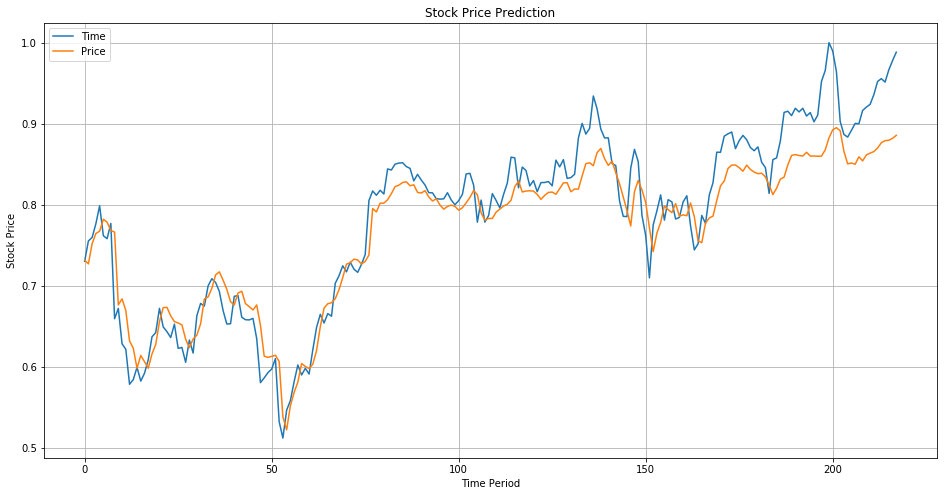

In [12]:
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = [10,6]

%matplotlib inline
plt.rcParams["figure.figsize"] = [16,8]

plt.plot(testY, label='Time')
plt.plot(testPredict, label='Price')
plt.legend()
plt.grid()
plt.title('Stock Price Prediction')
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>